### Code alongs - MLP - Multilayered perceptron

In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras.datasets.mnist import load_data

# from tensorflows documentation 
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [5]:
x_train.shape

(60000, 28, 28)

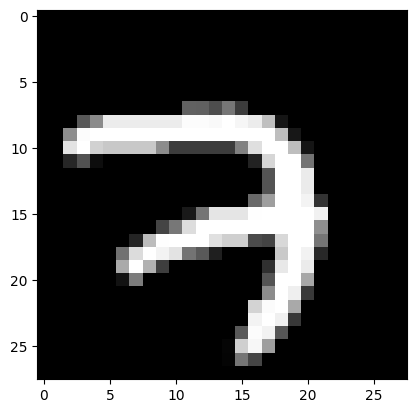

In [6]:
plt.imshow(x_train[5000], cmap="gray")

In [7]:
# 2D image for index 5000 - it contains 28x28 
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
x_train[5000].shape

(28, 28)

In [9]:
# pixel intensity between 0 and 254 for this image
x_train[5000].min(), x_train[5000].max()

(0, 254)

In [10]:
# pixel value at row 10, col 5 for image 5000
x_train[5000,10,5]

199

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
y_train.shape, y_train.min(), y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

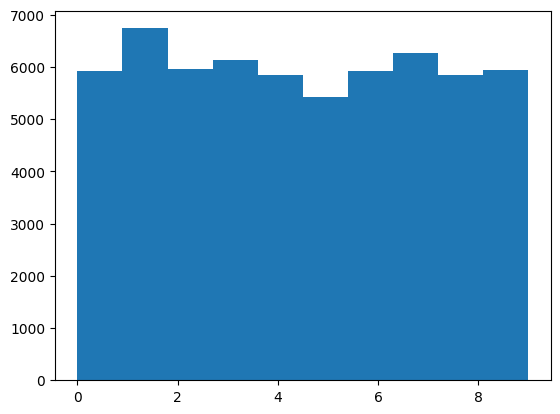

In [14]:
plt.hist(y_train)

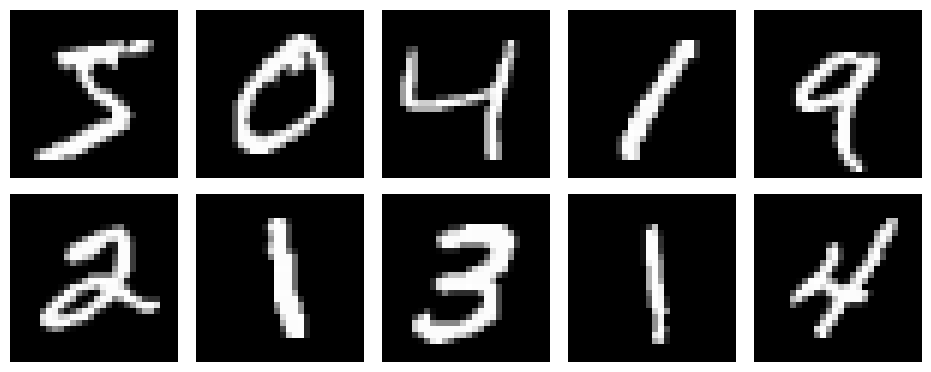

In [15]:
def display_images(data, n_rows = 2, n_cols = 5, figsize=(12,4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)

display_images(x_train)

(10, 28, 28)

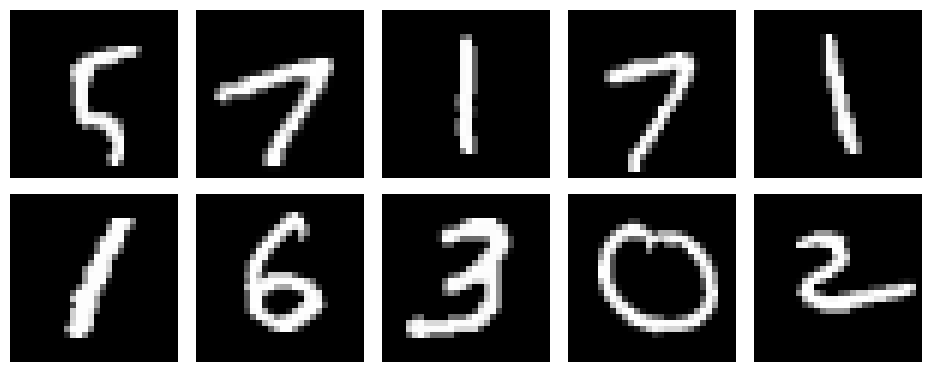

In [16]:
display_images(x_train[100:110])
x_train[100:110].shape

### Normalize data

In [17]:
X_train = x_train.astype("float32")/255
X_test = x_test.astype("float32")/255

X_train.min(), X_train.max()

(0.0, 1.0)

In [18]:
X_train[5000].reshape(-1).shape


(784,)

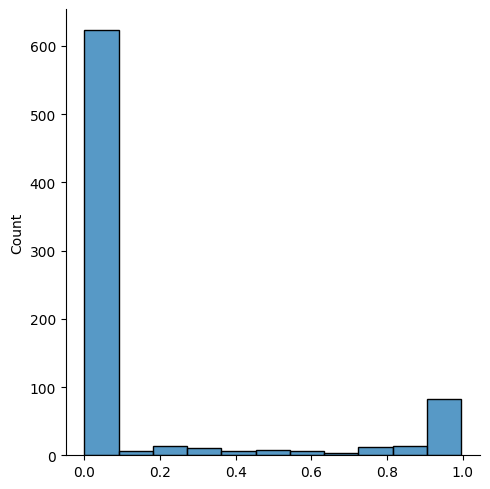

In [19]:
import seaborn as sns 

sns.displot(data = X_train[5000].reshape(-1), kind="hist")

### MLP model
- 10 output neurons/nodes (which represents 0,1,2,3,...,9, our classes)
- softmax activation function in output layer -> probabilities
- 784 neurons for input layer (28x28) -> use Flatten layer
- hidden layers -> Dense

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


def mlp_model(
    neurons: tuple | list = None,
    names: tuple | list = None,
    activations: tuple | list = [],
):
    model = Sequential(name="MLP_model")
    model.add(Flatten(input_shape=(28, 28), name="Input_layer"))

    # hidden layers + output
    for neuron, name, activation in zip(neurons, names, activations):
        model.add(Dense(neuron, name=name, activation=activation))

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )

    return model

# naive because we don't have any hidden layers
model_naive = mlp_model(neurons=[10], names=["Output_layer"], activations=["softmax"])
model_naive.summary()

c:\Users\annah\source\ArtificialIntelligence!-Python\github\AI-Anna-Holmstrom-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model_naive.fit(X_train, y_train, validation_split=1 / 6, epochs=20, verbose=1)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8003 - loss: 0.7733 - val_accuracy: 0.9154 - val_loss: 0.3071
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9114 - loss: 0.3232 - val_accuracy: 0.9213 - val_loss: 0.2810
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9168 - loss: 0.2974 - val_accuracy: 0.9253 - val_loss: 0.2687
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.9205 - loss: 0.2829 - val_accuracy: 0.9267 - val_loss: 0.2630
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.9253 - loss: 0.2686 - val_accuracy: 0.9269 - val_loss: 0.2598
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.9247 - loss: 0.2688 - val_accuracy: 0.9291 - val_loss: 0.2582
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.9264 - loss: 0.2669 - val_accuracy: 0.9289 - val_loss: 0.2589
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.9274 - loss:

In [22]:
import pandas as pd 

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.86990,0.502120,0.9154,0.307115
1,0.91220,0.316145,0.9213,0.280960
2,0.91752,0.292948,0.9253,0.268732
3,0.92100,0.281209,0.9267,0.263012
4,0.92310,0.273714,0.9269,0.259827


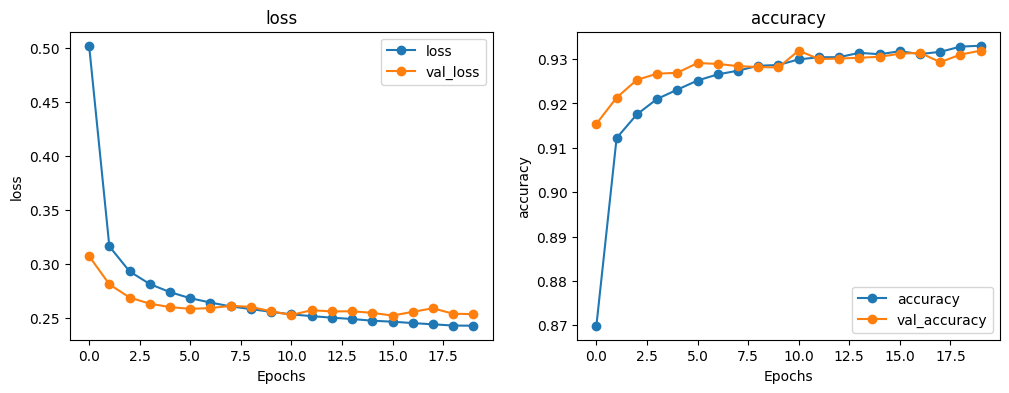

In [24]:
def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(
            y=metric,
            xlabel="Epochs",
            ylabel=metric[0],
            title=metric[0],
            ax=ax,
            style=style,
        )


plot_metrics(naive_history)

### Add hidden layers

In [26]:
model_deep = mlp_model(
    neurons=[128, 128, 10],
    activations=["relu", "relu", "softmax"],
    names=["Hidden_1", "Hidden_2", "Output"],
)

model_deep.summary()

c:\Users\annah\source\ArtificialIntelligence!-Python\github\AI-Anna-Holmstrom-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model_deep.fit(X_train, y_train, validation_split=1 / 6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8696 - loss: 0.4478 - val_accuracy: 0.9624 - val_loss: 0.1245
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9663 - loss: 0.1139 - val_accuracy: 0.9634 - val_loss: 0.1194
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9779 - loss: 0.0749 - val_accuracy: 0.9745 - val_loss: 0.0845
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9828 - loss: 0.0527 - val_accuracy: 0.9738 - val_loss: 0.0928
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9859 - loss: 0.0430 - val_accuracy: 0.9740 - val_loss: 0.0948
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9881 - loss: 0.0355 - val_accuracy: 0.9771 - val_loss: 0.0867
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9925 - loss: 0.0221 - val_accuracy: 0.9716 - val_loss: 0.1047
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9929 - loss: 0.0226 - 

In [28]:
deep_history = pd.DataFrame(model_deep.history.history)
deep_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.92440,0.256718,0.9624,0.124484
1,0.96816,0.105808,0.9634,0.119368
2,0.97730,0.074845,0.9745,0.084535
3,0.98226,0.055211,0.9738,0.092769
4,0.98614,0.043733,0.9740,0.094834


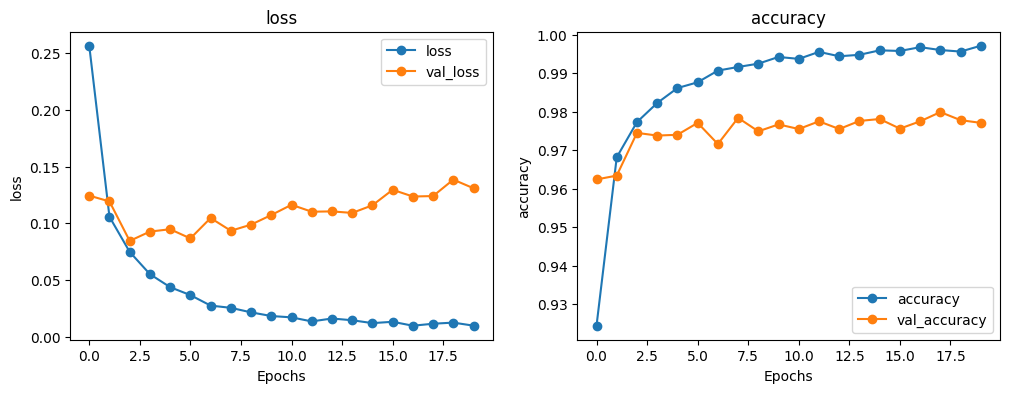

In [29]:
plot_metrics(deep_history)

In [30]:
# trains on all training data (60000)
model_deep.fit(X_train, y_train, epochs = 3, verbose=1)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9917 - loss: 0.0361
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9963 - loss: 0.0122
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9973 - loss: 0.0095


### Prediction and evaluation


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_deep.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step


array([[3.0762966e-14, 1.7600524e-12, 5.8630913e-11, ..., 1.0000000e+00,
        5.6324438e-13, 1.9759437e-10],
       [3.6920927e-13, 5.5797877e-11, 1.0000000e+00, ..., 2.4126048e-15,
        5.4760433e-14, 1.4676125e-22],
       [7.5610612e-12, 9.9999976e-01, 3.9790664e-09, ..., 2.3860392e-07,
        6.9744539e-09, 8.4272183e-13],
       ...,
       [5.7569423e-26, 1.9656983e-20, 1.1158975e-27, ..., 2.6143591e-20,
        9.9341658e-20, 3.3503057e-14],
       [4.2361280e-22, 1.6187582e-22, 2.0502997e-25, ..., 1.1138307e-19,
        5.8555473e-11, 1.3218840e-20],
       [6.2128961e-20, 2.3895782e-30, 1.6774600e-30, ..., 2.0413207e-29,
        1.1036582e-20, 9.5431351e-21]], dtype=float32)

In [33]:
y_pred[1]

array([3.6920927e-13, 5.5797877e-11, 1.0000000e+00, 4.0306940e-14,
       1.4046443e-20, 1.6359527e-16, 1.2049110e-14, 2.4126048e-15,
       5.4760433e-14, 1.4676125e-22], dtype=float32)

In [34]:
y_test[1]

2

In [35]:
y_pred.shape

(10000, 10)

In [36]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.95      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



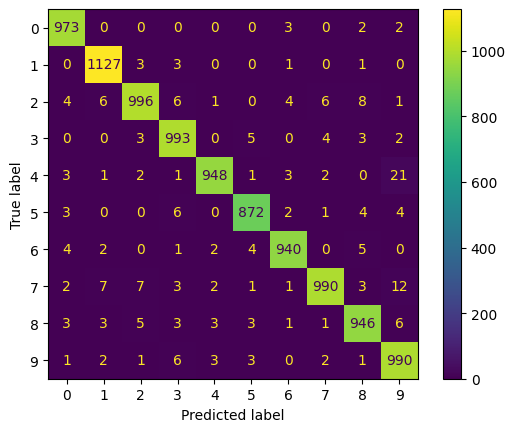

In [38]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### Some misclassifications

In [39]:
(y_pred != y_test).sum()

225

In [40]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_indices[:10]

array([115, 124, 149, 217, 247, 321, 445, 447, 582, 659], dtype=int64)

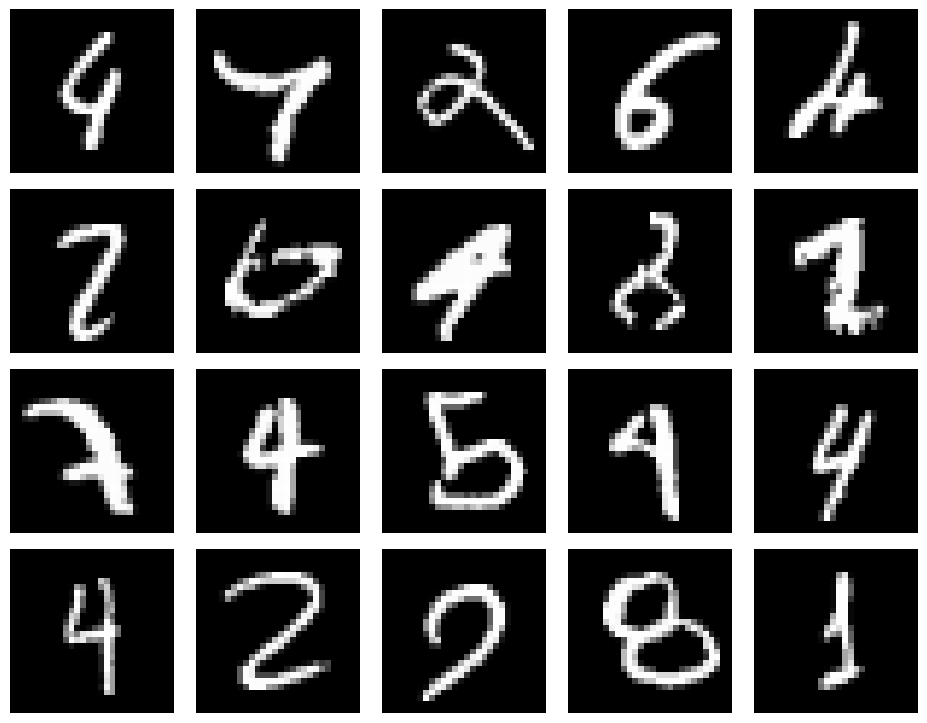

In [41]:
display_images(X_test[misclassified_indices], 4, 5, (12, 8))